In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import seaborn as sns


In [12]:
data_dir = "D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Train"  
num_classes = 43

images = []
labels = []

for label in range(num_classes):
    folder_path = os.path.join(data_dir, str(label))
    if not os.path.exists(folder_path):
        print(f"file not {folder_path} existing!")
        continue
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"fail in reafing file {img_path}: {e}")


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_24400\2244078322.py:1: SyntaxWarning: invalid escape sequence '\T'
  data_dir = "D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Train"


In [13]:
X = np.array(images)
y = np.array(labels)

print("num of images :", X.shape[0])
print("Shape:", X.shape[1:]) 
print("length:", len(np.unique(y)))



num of images : 39209
Shape: (64, 64, 3)
length: 43


In [14]:
X = X.astype('float32') / 255.0

y_cat = to_categorical(y, num_classes)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, shuffle=True
)



print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (31367, 64, 64, 3)
Shape y_train: (31367, 43)
Shape X_test: (7842, 64, 64, 3)
Shape y_test: (7842, 43)


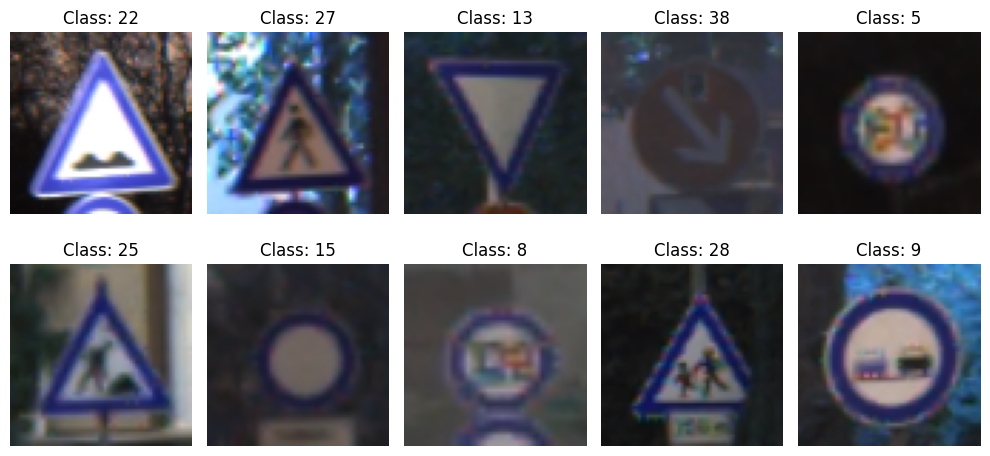

In [16]:
plt.figure(figsize=(10,5))
for i in range(10):
    idx = np.random.randint(0, len(X_train))
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx])
    plt.title(f"Class: {np.argmax(y_train[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(43, activation='softmax')  
])

C:\Users\ELGENDY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,630,699 (6.22 MB)

 Trainable params: 1,630,699 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/3
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.3582 - loss: 2.4206 - val_accuracy: 0.9097 - val_loss: 0.3873
Epoch 2/3
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.8005 - loss: 0.6500 - val_accuracy: 0.9594 - val_loss: 0.1706
Epoch 3/3
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.8719 - loss: 0.4133 - val_accuracy: 0.9714 - val_loss: 0.1081


In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


Accuracy: 0.97


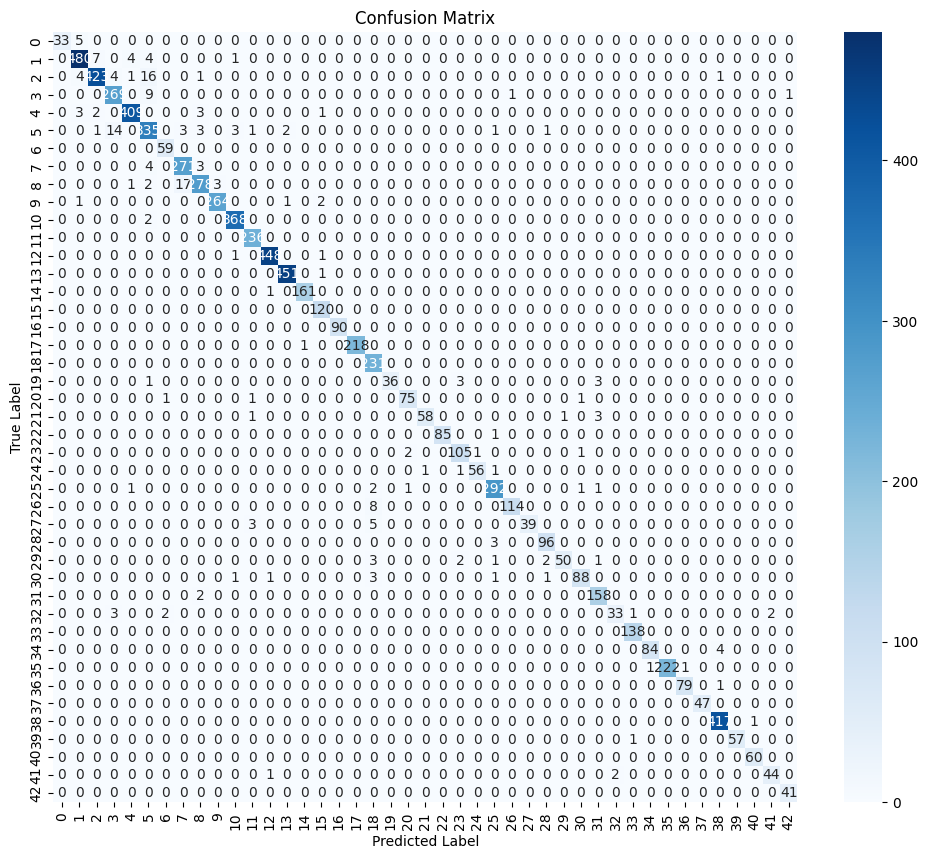

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        38
           1       0.97      0.97      0.97       496
           2       0.98      0.94      0.96       450
           3       0.93      0.96      0.94       280
           4       0.98      0.98      0.98       418
           5       0.90      0.92      0.91       364
           6       0.95      1.00      0.98        59
           7       0.93      0.97      0.95       278
           8       0.96      0.92      0.94       301
           9       0.99      0.99      0.99       268
          10       0.98      0.99      0.99       370
          11       0.98      1.00      0.99       236
          12       0.99      1.00      0.99       450
          13       0.99      1.00      1.00       452
          14       0.99      0.99      0.99       162
          15       0.96      1.00      0.98       120
          16       1.00      1.00      1.00        90
   

In [24]:
#Accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
class_report = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=[str(i) for i in range(num_classes)])
print("Classification Report:\n", class_report)

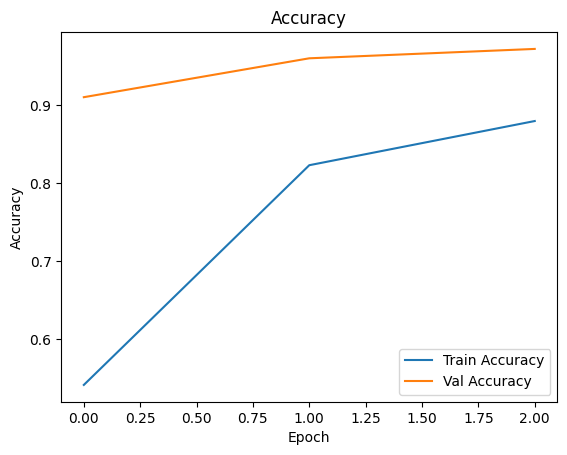

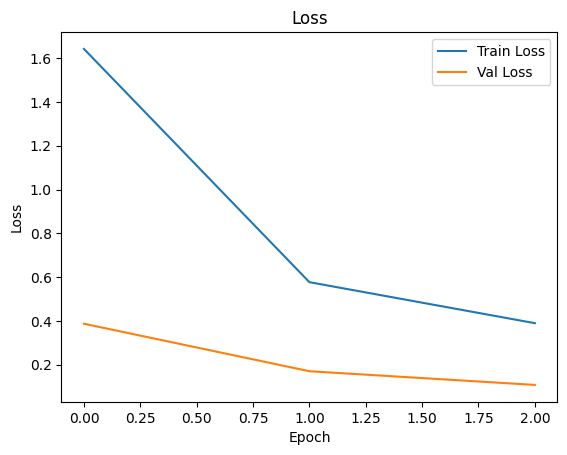

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Load data from Test file

In [ ]:
test_df = pd.read_csv("D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_2492\111701066.py:1: SyntaxWarning: invalid escape sequence '\T'
  test_df = pd.read_csv("D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test.csv")


In [ ]:
test_df["Path"].head()

0    Test/00000.png
1    Test/00001.png
2    Test/00002.png
3    Test/00003.png
4    Test/00004.png
Name: Path, dtype: object

In [ ]:
test_images = []
test_labels = []
missing_images = []

for idx, row in test_df.iterrows():
    img_path = os.path.join("D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test" ,row["Path"])
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        missing_images.append(img_path)
        continue
    try:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        test_images.append(img)
        test_labels.append(row["ClassId"])
    except Exception as e:
        print(f"Failed to load {img_path}: {e}")



<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_2492\2195827827.py:6: SyntaxWarning: invalid escape sequence '\T'
  img_path = os.path.join("D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test" ,row["Path"])


Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00000.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00001.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00002.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00003.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00004.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00005.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00006.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00007.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00008.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00009.png
Image not found: D:\Training Sets\Elevvo\Traffic Sign Recognition\Data\Test\Test/00010.png

In [ ]:
print("Number of missing images:", len(missing_images))

Number of missing images: 12630


In [ ]:
X_final_test = np.array(test_images).astype("float32") / 255.0
y_final_test = to_categorical(np.array(test_labels), num_classes=43)

print("numper of photos in final:", X_final_test.shape)


numper of photos in final: (0,)
